## The Sparks Foundation: Data Science and Business Analytics Intern


### TASK 2 Prediction Using Unsupervised ML


### BY : GARGI 


### Question : From the given 'Iris' dataset,predict the optimum number of clusters and represent it visually.

### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


In [21]:
#Import data 

df= pd.read_csv (r'C:\Users\user\Downloads\Iris.csv')   
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Checking the distribution of the target class

df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
#Descriptive Statistics

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


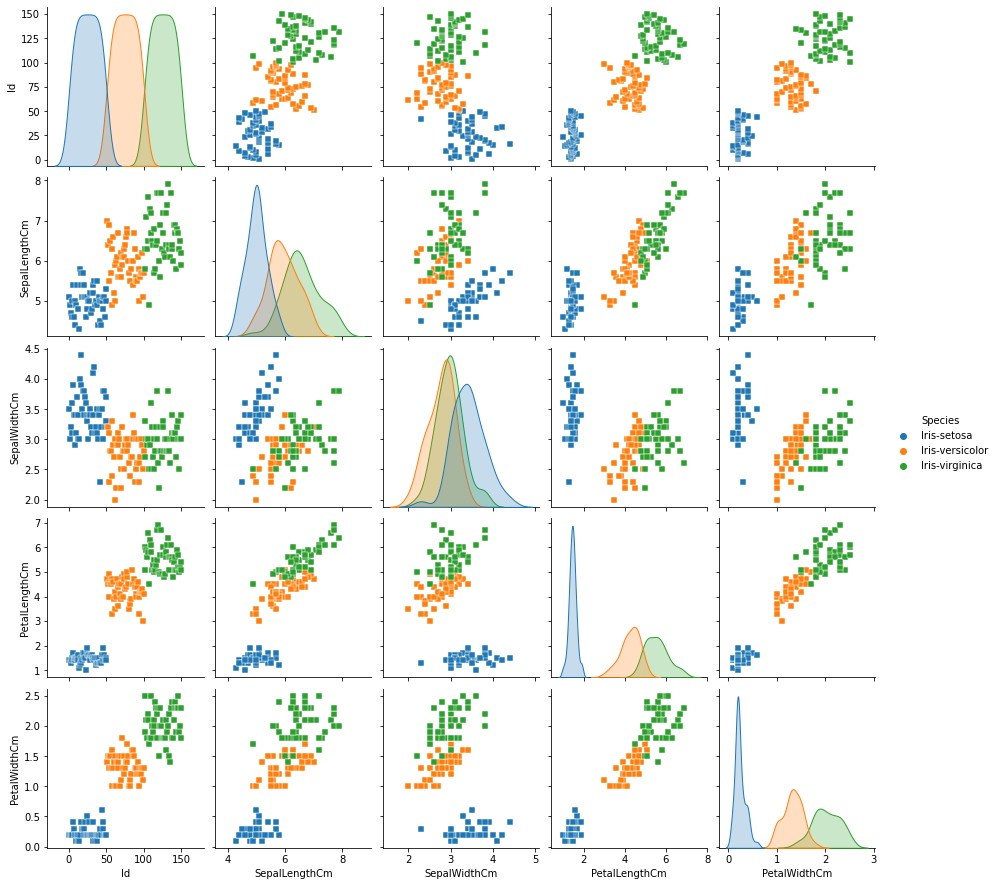

In [10]:
#Visualize the relationship between each type of column variable

sns.pairplot(df, hue='Species', markers='s')
plt.show()

In [11]:
#Dropped unnecessary columns

df.drop("Id",inplace=True,axis=1)
df.drop("Species",inplace=True,axis=1)

<AxesSubplot:>

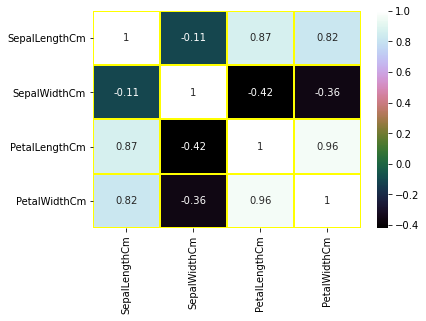

In [12]:
#Heatmap to show correlation between each column

sns.heatmap(df.corr(), linecolor = 'Yellow',linewidth=1, annot=True,cmap="cubehelix")

## Data Preprocessing

In [20]:
x = df.iloc[:, 1:5].values
x

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.1, 1.5, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

## Find the Optimum no of clusters using Elbow method

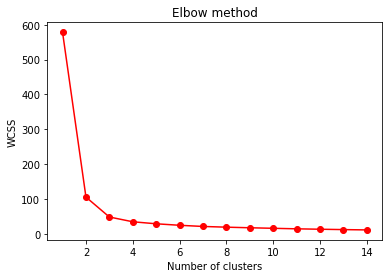

In [14]:
from sklearn.cluster import KMeans
s = []
for k in range(1, 15):
    km = KMeans(n_clusters = k)
    km.fit(x)
    s.append(km.inertia_)
plt.plot(range(1, 15), s,'ro-')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of square
plt.show()

### From above elbow occurs at k = 3

## Training

In [15]:
km = KMeans(n_clusters = 3)
predict = km.fit_predict(x)

In [16]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Cluster Visualization


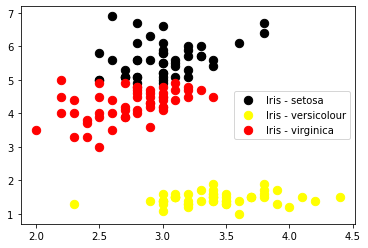

In [23]:
plt.scatter(x[predict == 0,0], x[predict == 0,1], s = 70, color = 'Black', label = 'Iris - setosa')
plt.scatter(x[predict == 1,0], x[predict == 1,1], s = 70, color = 'yellow', label = 'Iris - versicolour')
plt.scatter(x[predict == 2,0], x[predict == 2,1], s = 70, color = 'red', label = 'Iris - virginica')
plt.legend()

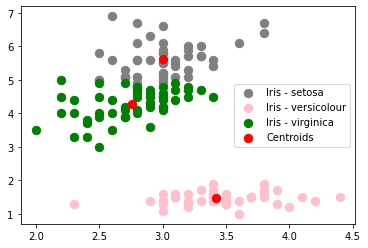

In [28]:
# Plotting centroids of the clusters
plt.scatter(x[predict == 0,0], x[predict == 0,1],s = 70, color = 'grey', label = 'Iris - setosa')
plt.scatter(x[predict == 1,0], x[predict == 1,1],s = 70, color = 'pink', label = 'Iris - versicolour')
plt.scatter(x[predict == 2,0], x[predict == 2,1],s = 70, color = 'Green', label = 'Iris - virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 70, color = 'red', label = 'Centroids')
plt.legend()